In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math

from glob import glob

import reduce_dblspec 
import pipeline

from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.table import Table

from astropy import modeling
from astropy import constants as cnst

## this notebook is to reduce data taken on night ending November 8, 2015

# Dispersion Solutions
### RED 1.5"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


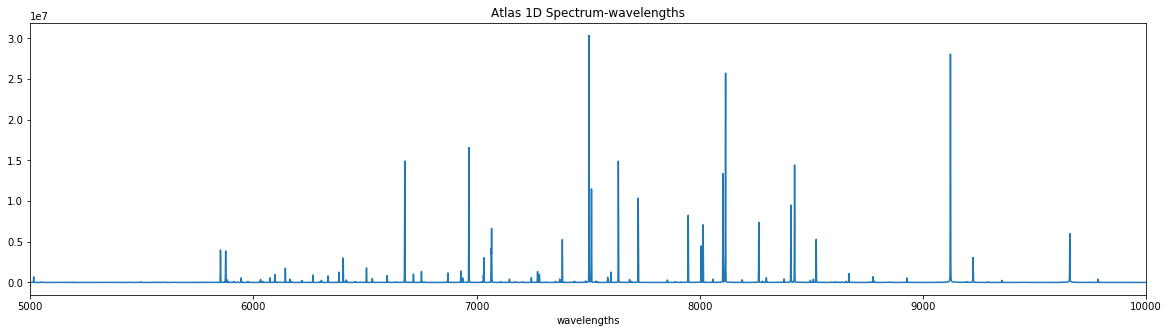

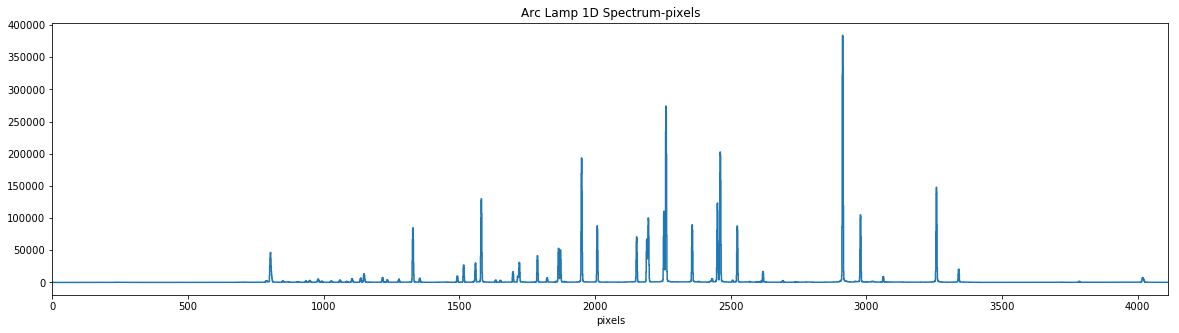

In [2]:
#generating atlas & arc graphs for wl & pixel matching

#nameing all the datafiles needed
all_side_files_red15 = 'DoubleSpec/20151108/red*.fits' #redside
atlasfiles_red15 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red15 = 'DoubleSpec/20151108/red0015.fits' #redside
linelist_red15 = reduce_dblspec.HENEAR_LINE_LIST #must be in this form cant use'henearhres.dat'-debug later
flatid = 'DomeFlats 1p5'

#naming pipeline output for guess_plot use
specset_red15 = pipeline.dispersion(all_side_files_red15, atlasfiles_red15, arcfiles_red15, linelist_red15,flatid)

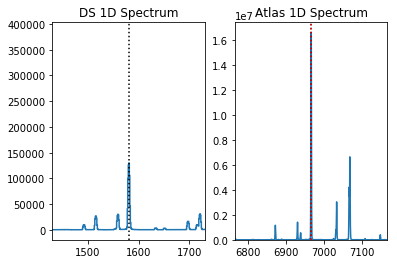

In [3]:
#collecting guesses of matching lines from above graphs

#entering (px,wl)guesses & data
pipeline.guess_plot(1580,6965.43,specset_red15) #outputs (pixel guess, nearest wl/id in linelist)


#collect those guesses here ~5 seems good
pixel_guesses_red15 = [3256,2911,2260,1949] #,1580]
atlas_lines_red15 = [9657.78,9122.9674,8115.31,7635.1]#,6965.43]
guesses_red15 = list(zip(pixel_guesses_red15, atlas_lines_red15)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line KrI at wl=7685.246: "Guessed line's peak to base ratio is 1.1257582564872912, which is less than 10"
Failed to find line KrI at wl=7694.5393: "Guessed line's peak to base ratio is 1.0241725941549886, which is less than 10"
Failed to find line KrI at wl=7854.8215: "Guessed line's peak to base ratio is 0.9774445091946192, which is less than 10"
Failed to find line ArI at wl=7891.075: "Tried to find peak at 2116.1446659297253 but it's in a valley, not a peak"
Failed to find line KrI at wl=7913.4242: "Guessed line's peak to base ratio is 0.984078937160125, which is less than 10"
Found line ArI at wl=7948.1764
Clipped 0 lines
Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 2.594319909994525, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 4.666815392546264, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 1.012661498818794, which is le

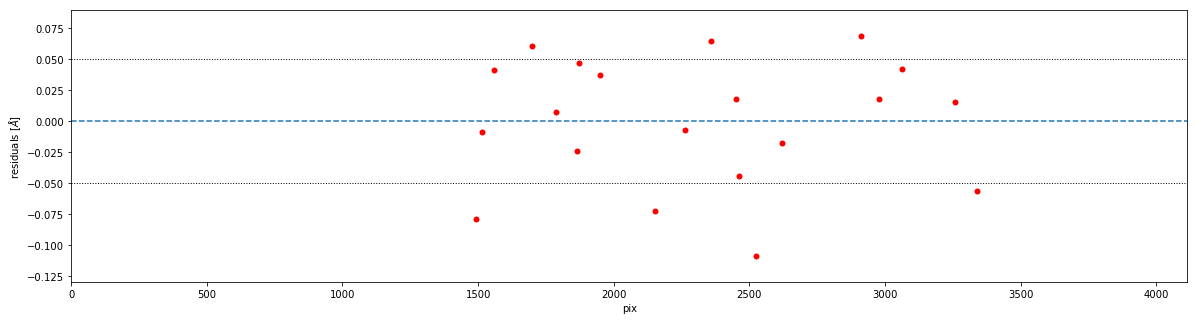

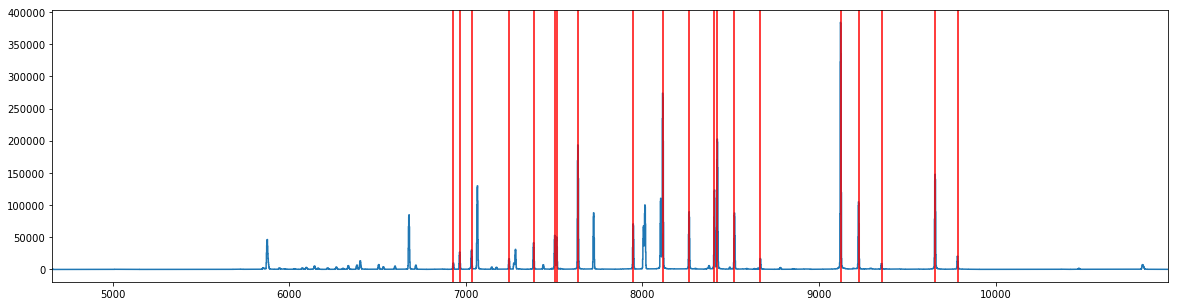

In [4]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red15 = pipeline.goodness_of_matches(arcfiles_red15,guesses_red15,all_side_files_red15,atlasfiles_red15,linelist_red15,flatid)

## Red 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


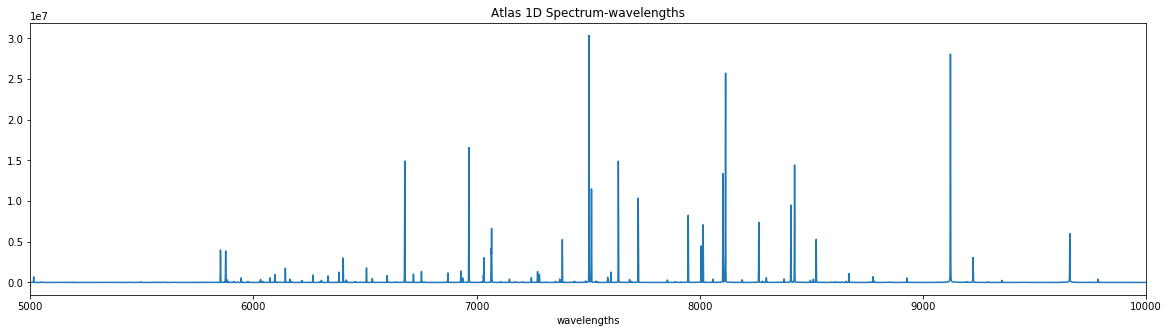

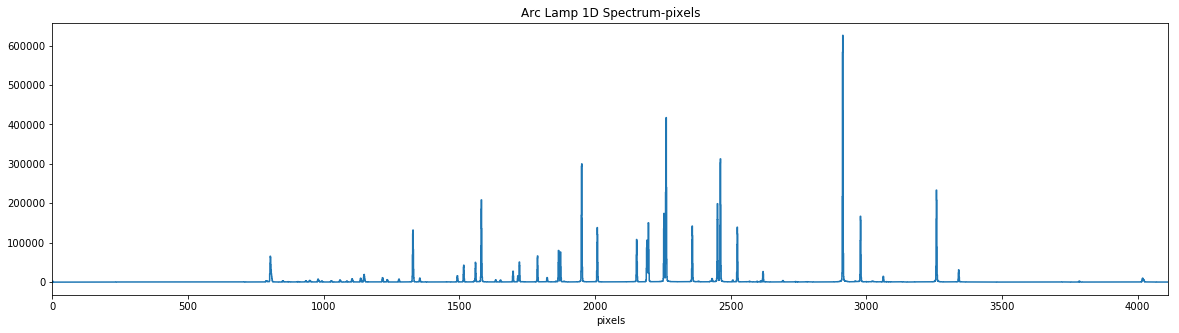

In [5]:
#nameing all the datafiles needed
all_side_files_red10 = 'DoubleSpec/20151108/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20151108/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST
flatid = 'DomeFlats 1p0'

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

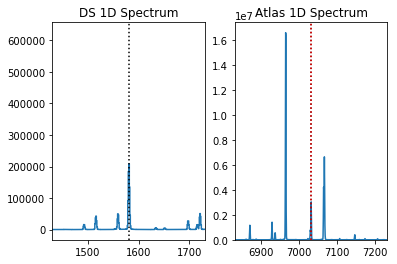

In [6]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1580,7032.4131,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2911,2260,1949,3256]#,1580]
atlas_lines_red10 = [9122.9674,8115.311,7635.106,9657.7863]#,7032.4131,]
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Found line ArI at wl=7948.1764
Clipped 0 lines
Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 7.095376065795912, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 5.811893417670786, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 1.032785285130671, which is less than 10"
Found line ArI at wl=8103.6931
Clipped 0 lines
Found line ArI at wl=8115.311
Clipped 0 lines
Failed to find line KrI at wl=8190.0543: "Guessed line's peak to base ratio is 1.0636024844546064, which is less than 10"
Found line ArI at wl=8264.5225
Clipped 0 lines
Failed to find line KrI at wl=8281.0495: "Tried to find peak at 2368.6963178083356 but it's in a valley, not a peak"
Failed to find line NeI at wl=8377.6065: "Guessed line's peak to base ratio is 5.187375208436419, which is less than 10"
Found line ArI at wl=8408.2096
Clipped 0 lines
Found line ArI at wl=8424.6475
Clipped 0 li

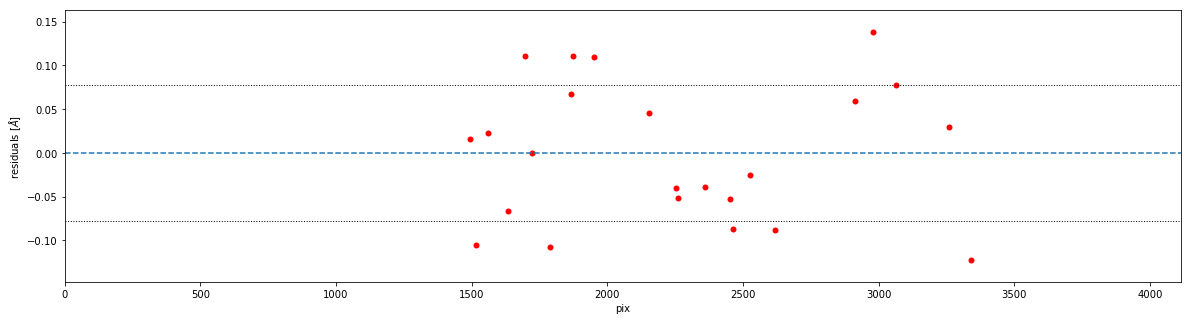

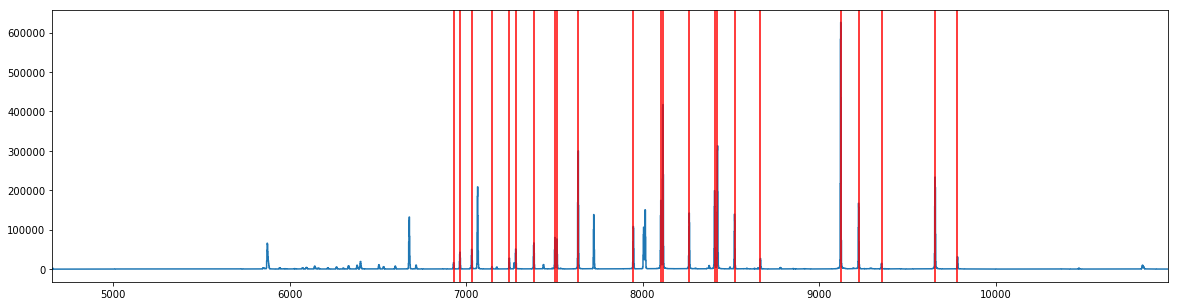

In [7]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

## Blue 1.5"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


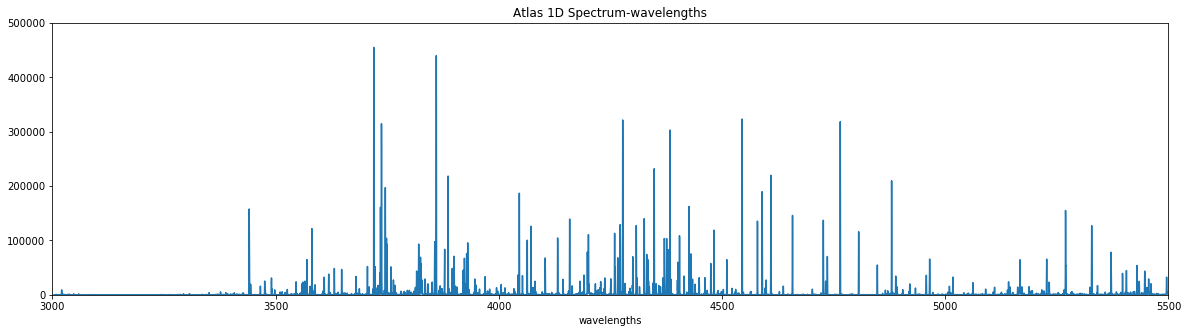

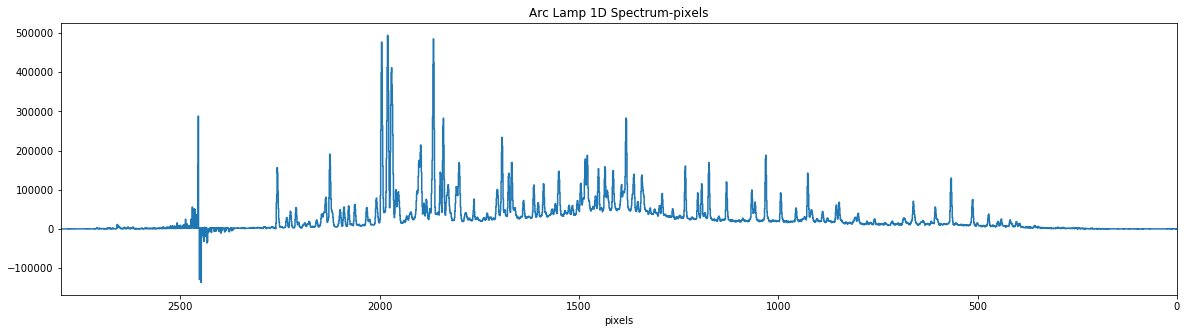

In [8]:
all_side_files_blue15 = 'DoubleSpec/20151108/blue*.fits' #blueside
atlasfiles_blue15 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue15 = 'DoubleSpec/20151108/blue0015.fits' #blueside
linelist_blue15 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later
flatid = 'DomeFlats 1p5'

specset_blue15 = pipeline.dispersion(all_side_files_blue15, atlasfiles_blue15, arcfiles_blue15, linelist_blue15,flatid)

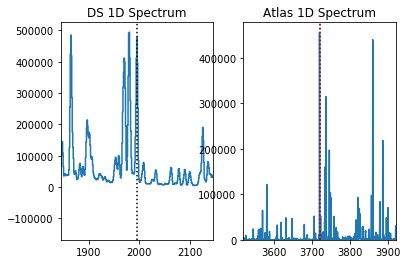

In [9]:
pipeline.guess_plot(1995,3719.9346,specset_blue15) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue15 = [565,1031,1693,1995,2123]
atlas_lines_blue15 = [5269.5366,4764.8646,4044.4179,3719.9346,3581.1925] 

guesses_blue15 = list(zip(pixel_guesses_blue15, atlas_lines_blue15)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside
chose guesses for blueside
Failed to find line FeI at wl=3020.6391: "Guessed line's peak to base ratio is 2.0771086572008346, which is less than 5"
Failed to find line FeI at wl=3024.0325: "Tried to find peak at 2659.9808819501272 but it's in a valley, not a peak"
Failed to find line FeI at wl=3037.3887: "Guessed line's peak to base ratio is 0.9288073322461171, which is less than 5"
Failed to find line FeI at wl=3047.6043: "Guessed line's peak to base ratio is 0.4278981839590608, which is less than 5"
Failed to find line FeI at wl=3057.4456: "Tried to find peak at 2627.256920703864 but it's in a valley, not a peak"
Failed to find line FeI at wl=3059.0856: "Guessed line's peak to base ratio is 0.6296365991181009, which is less than 5"
Found line FeI at wl=3225.785
Clipped 0 lines
Failed to find line ArII at wl=3243.6887: "Guessed line's peak to base ratio is 0.7740423622322776, which is less than 5"
Failed to find line ArII at wl=3350.9243: "Guessed line's peak to 

Failed to find line ArII at wl=4498.5384: "Guessed line's peak to base ratio is 1.0494700494930458, which is less than 5"
Failed to find line ArII at wl=4502.9268: "Guessed line's peak to base ratio is 1.4023552907692958, which is less than 5"
Found line ArI at wl=4510.7332
Clipped 0 lines
Failed to find line ArI at wl=4522.323: "Guessed line's peak to base ratio is 1.7004749566284192, which is less than 5"
Failed to find line FeI at wl=4528.6133: "Guessed line's peak to base ratio is 2.14554758196123, which is less than 5"
Failed to find line FeI at wl=4530.5523: "Guessed line's peak to base ratio is 2.14554758196123, which is less than 5"
Found line ArII at wl=4545.0519
Clipped 0 lines
Found line ArII at wl=4579.3495
Clipped 0 lines
Found line ArII at wl=4589.8978
Clipped 0 lines
Failed to find line ArI at wl=4596.0967: "Guessed line's peak to base ratio is 2.0132876403613316, which is less than 5"
Failed to find line ArII at wl=4598.7627: "Guessed line's peak to base ratio is 2.0132

Skipping line ArI at wl=7316.005 - out of wl min/max
Skipping line ArI at wl=7353.293 - out of wl min/max
Skipping line ArI at wl=7372.1184 - out of wl min/max
Skipping line ArI at wl=7383.9805 - out of wl min/max
Skipping line ArI at wl=7392.9801 - out of wl min/max
Skipping line ArI at wl=7412.3368 - out of wl min/max
Skipping line ArI at wl=7425.2942 - out of wl min/max
Skipping line ArI at wl=7435.3683 - out of wl min/max
Skipping line ArI at wl=7471.1641 - out of wl min/max
Skipping line ArI at wl=7484.3267 - out of wl min/max
Skipping line ArI at wl=7503.8691 - out of wl min/max
Skipping line ArI at wl=7514.6518 - out of wl min/max
Skipping line ArII at wl=7589.3151 - out of wl min/max
Skipping line ArI at wl=7635.106 - out of wl min/max
Skipping line ArI at wl=7670.0575 - out of wl min/max
Skipping line ArI at wl=7798.5604 - out of wl min/max
Skipping line ArI at wl=7868.1946 - out of wl min/max
Skipping line ArI at wl=7891.075 - out of wl min/max
Skipping line ArI at wl=7916.44

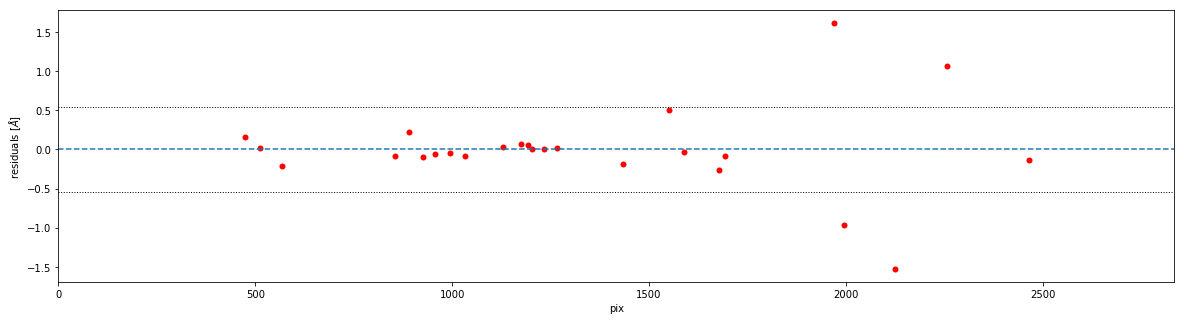

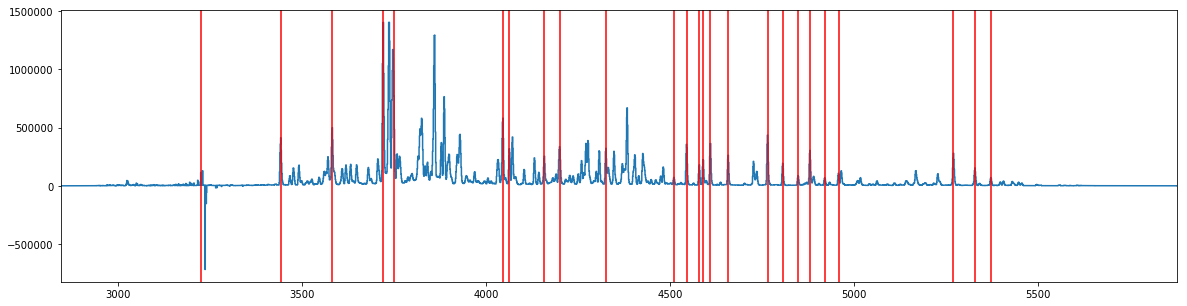

In [10]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution


#did a ds for this one only but residuals in 2000s are bad....redo

ds_blue15 = pipeline.goodness_of_matches(arcfiles_blue15,guesses_blue15,all_side_files_blue15,atlasfiles_blue15,linelist_blue15,flatid) #yay looks good FINALLY!!

## Blue 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


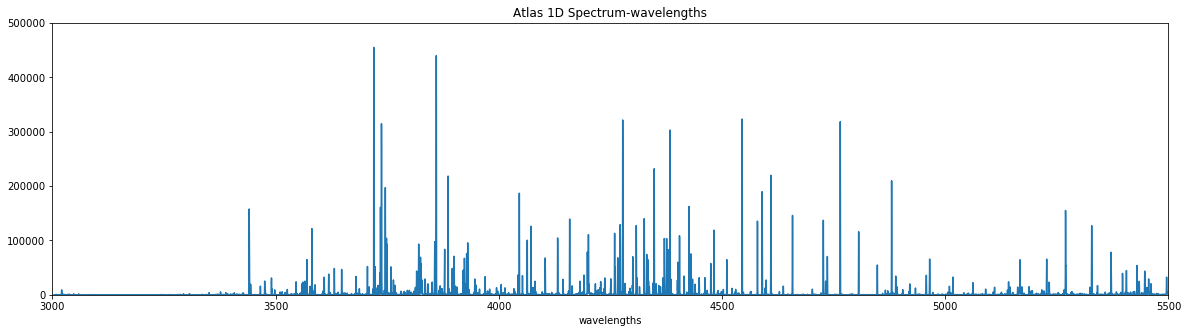

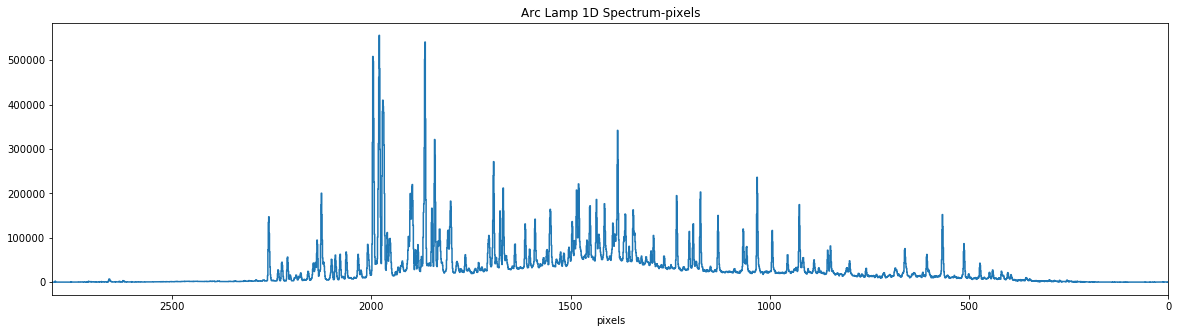

In [11]:
all_side_files_blue10 = 'DoubleSpec/20151108/blue*.fits' #blueside
atlasfiles_blue10 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue10 = 'DoubleSpec/20151108/blue0012.fits' #blueside
linelist_blue10 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later
flatid = 'DomeFlats 1p0'

specset_blue10 = pipeline.dispersion(all_side_files_blue10, atlasfiles_blue10, arcfiles_blue10, linelist_blue10,flatid)

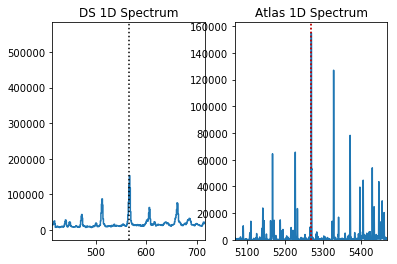

In [12]:
pipeline.guess_plot(565,5269,specset_blue10) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue10 = [565,1031,2125,1995] #,1657
atlas_lines_blue10 = [5269.5366,4764.8646,3581.1925,3719.9346] #,4045.8130

guesses_blue10 = list(zip(pixel_guesses_blue10, atlas_lines_blue10)) #making tuples to pass into fcn later

In [13]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

#residuals only ok here, could try redo


ds_blue10 = pipeline.goodness_of_matches(arcfiles_blue10,guesses_blue10,all_side_files_blue10,atlasfiles_blue10,linelist_blue10,flatid) #yay looks good FINALLY!!

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside


ValueError: Tried to find peak at 565 but it's in a valley, not a peak

## Standard Star Reduction

In [ ]:
# BD +284211 frames64-65 for 1.0"

targetID_red10 = 'BD_28_4211'
skyaps_red10 = [(80,110),(145,150)] #works with poly3 #[(50,115),(160,400)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
specaps=(120,140)#(115,180)
vmax=40
vmin=-10
#model=('poly',3)#'linear'
model=('linear')
flux_red10_BDSS,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
#plt.ylim(0,10**20)
##plt.ylim(0,4000)
#plt.ylim(0,100000000000000000000) #10**20 is the min for bad, even **19.9 was ok
#plt.xlim(4500,11000) #consider chopping crazy edges up to 5,000 min
plt.yscale('log') #to match eso spec and b/c so bright 
plt.ylim(0,100000)
plt.xlim(4600,11000)

In [ ]:
targetID_blue10 = 'BD_28_4211'
skyaps_blue10 = [(75,140),(300,340)]#[(80,110),(145,150)] #works with poly3 #[(50,115),(160,400)]
all_side_files_target='DoubleSpec/20151108/blue*.fits'
flatid='DomeFlats 1p0'
specaps=(245,280)#(120,140)#(115,180)
vmax=40
vmin=-10
model=('poly',2)#'linear'
#model=('linear')
flux_blue10_BDSS,unc,comb = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)
#plt.ylim(0,10**20)
##plt.ylim(0,4000)
#plt.ylim(0,100000000000000000000) #10**20 is the min for bad, even **19.9 was ok
#plt.xlim(4500,11000) #consider chopping crazy edges up to 5,000 min
plt.yscale('log') #to match eso spec and b/c so bright 
plt.ylim(0,1000000)
plt.xlim(2700,6000)

In [ ]:
#Left off trying to rid left edge above of oversubtraction and then need to combine r/b and
#compare to eso spec graph for flux adjustment...get here fast and slack eric

In [ ]:
plt.figure(figsize=(20,10))
SStar=pipeline.combine_red_blue(ds_red10,ds_blue10,flux_red10_BDSS,flux_blue10_BDSS)
plt.yscale('log')
plt.ylim(0,10000000)
print('heavy oversubtraction on blue edge')
plt.title('1D Spectrum for Target',fontsize=20)

In [ ]:
#ignore -bad attempts at opening eso ss data

##t=fits.open("fbd28d4211.dat","r")
##t.readlines()
#t=open("aaareadme.hst",'r')
#t[0].header
##with open('fbd28d4211.dat') as f:
##    [line.split()[1] for line in f]


#SStar=list(generate_values_for_filename("fbd28d4211.dat")) #from fcn used in saga spreadsheet
#ss_wl_1=np.array(SStar[7:76:17])
#ss_wl_2=np.array(SStar[76:89932:16])
#ss_wl_1=np.array(SStar[7:76:17])

#ss_wl=
#ss_flux_ergs=np.array(SStar[12::17])
#ss_flux_mjy=np.array(SStar[17::17])
#sstar_table = Table([ss_wl, ss_flux_ergs, ss_flux_mjy], names=('wl','flux-ergs','flux-mjy'))

#sstar_table
#print('messing up b/c based on wl values theres more/less blank spaces btwn to count')

In [ ]:
#opening ESO standard to compare flux values
#fbd28d4211.dat flux values for bd284211  
##The 'f' files list wavelength ( A ), flux ( ergs/cm/cm/s/A * 10**16 )and flux ( milli-Jy ) and bin (A)
#only 3 columns of data, last 'bin' column doesnt appear to be there
#mbd28d4211.dat wl values for bd284211
##The 'm' files list wavelength ( A ), AB magnitude and bin (A)

file = open('fbd28d4211.dat')
lst = []
for line in file:
    lst += [line.split()]
##print(lst[0::])
data=[]
mylist=np.array(lst)
for row in mylist:
    for i in row:
        data.append(i)
        #print(i)
#print(data) #this looks correct, one list all data values
ss_wl=np.array(data[0::3],dtype='f')
ss_flux_ergs=np.array(data[1::3],dtype='f')
ss_flux_mjy=np.array(data[2::3],dtype='f')
sstar_table=Table([ss_wl, ss_flux_ergs, ss_flux_mjy], names=('wl','flux-ergs','flux-mjy'))
#sstar_table #GOOD

#print(len(ss_wl)) #5105
plt.figure(figsize=(20,10))
plt.plot(sstar_table['wl'],sstar_table['flux-ergs'])
plt.yscale('log')
plt.xlim(3000,11000)
plt.title('BD +28 4211 1D Spectrum from ESO',fontsize=20)
plt.ylabel('Flux (ergs/cm/cm/s/A * 10**16)',fontsize=20)
plt.xlabel('Wavelength $\AA$',fontsize=20)

In [ ]:
#need my observations/eso flux = sensitivity fcn...
#multiply this by observed to get correct flux

#this limits eso data to only within dblspec range
a = np.where((sstar_table['wl'] <= 11000) & (sstar_table['wl'] >= 2600)) 
sstar_table2 = sstar_table[a]
sstar_table2

In [ ]:
#now that its reduced and plotted well, need to fit a line to eso flux data
#least squares fitting

#using wl range cuts on eso data for fitting
ss_wl = sstar_table2['wl']
ss_flux_ergs = sstar_table2['flux-ergs']

plt.figure(figsize=(20,10))
plt.plot(ss_wl,ss_flux_ergs,color='g')
coeff = np.polyfit(ss_wl,ss_flux_ergs,3)
print ('coeffs are:',coeff)
x = np.arange(np.min(ss_wl),np.max(ss_wl),100)
y = x*coeff[0]+coeff[1]

# plot best fit line
bf_line = plt.plot(x,y,color='b')
plt.yscale('log')
plt.ylabel('flux',fontsize=15)
plt.xlabel('wavelength',fontsize=15)
plt.title('Least Squares Fitting on ESO stdstar data',fontsize=20)

In [ ]:
t=fits.open('DoubleSpec/20151108/blue0063.fits')
t[0].header

In [ ]:
#Target list

#AnaK-1 1.0"
#ANaK-2 1.0"


## AnaK-1

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


4 target files located
choose 2D spec for redside
choose 1D target spec axis limits for redside


(-200, 1000)

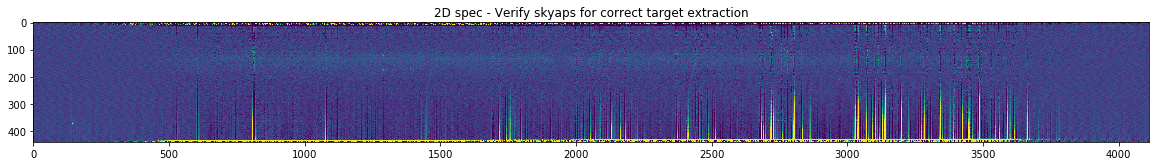

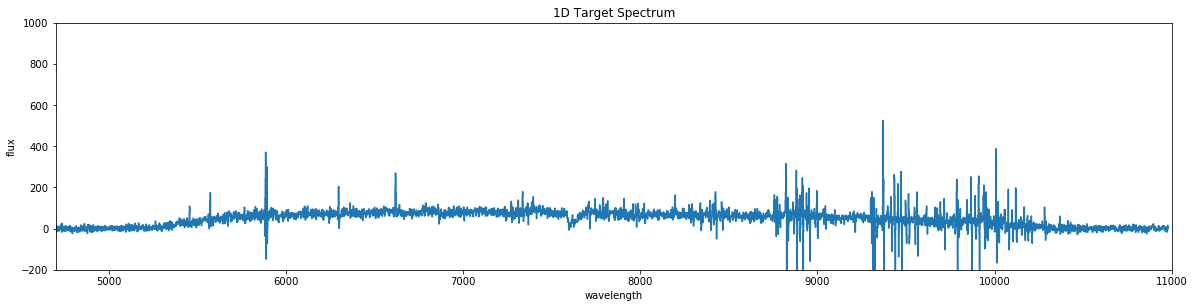

In [14]:
targetID_red10 = 'AnaK_1'
#skyaps_red10 = [(50,115),(185,320)] #works with poly3 #[(50,115),(160,400)]
skyaps_red10 = [(50,110),(155,230)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
#specaps=(120,155) works with skyaps 50,115,185,320#(115,180)
specaps=(120,150) #super narrowed in to find it better, but #'ed out was original best#120-150
vmax=40
vmin=-10
#model=('poly',3)#'linear'
model='linear'#('legendre',2)
flux_red10_AK1,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-200,1000)

In [ ]:
#ended playing with sky aps and spec aps on above. want to run eriks modeling test next
#need to slack about fitting flux, but first try matching data tables by wl and compare 
#ratios saga/eso to plot how spec would +/- plot ratio line with saga spec same graph

In [ ]:
targetID_blue10 = 'AnaK_1'
skyaps_blue10 = [(140,270),(305,340)]#[(150,270),(305,400)]--works with poly2#[(50,115),(185,320)]
all_side_files_target='DoubleSpec/20151108/blue*.fits'
flatid='DomeFlats 1p0'

specaps=(285,295)#(275,300) #####(255,310)#gets both emission line wiggles
vmax=40
vmin=-10
#model='linear'
model=('poly',2)
flux_blue10_AK1,unc,comb = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-200,500)

In [ ]:
plt.step(ds_blue10.pixtowl(np.arange(len(flux_blue10_AK1))), flux_blue10_AK1)

In [ ]:
plt.figure(figsize=(20,10))
AK1_flux,AK1_wl=pipeline.combine_red_blue(ds_red10,ds_blue10,flux_red10_AK1,flux_blue10_AK1)
plt.ylim(-200,600)

In [ ]:
t=fits.open('DoubleSpec/20151108/blue0095.fits')
t[0].header

# AnaK-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


(-200, 1000)

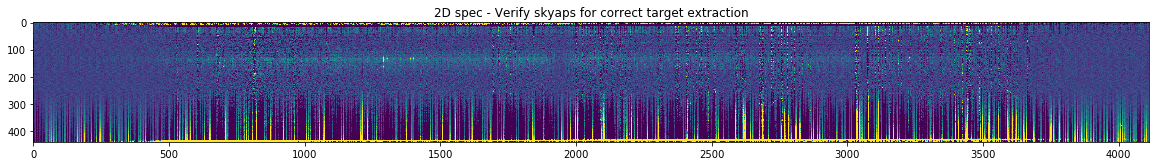

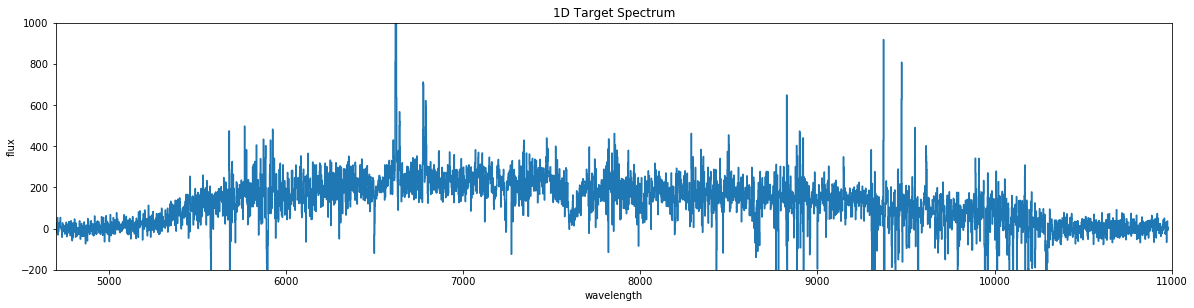

In [15]:
#1.0" frames 95-97
targetID_red10 = 'AnaK_2'
skyaps_red10 = [(50,100),(195,250)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
specaps=(110,160) 
vmax=40
vmin=-10
model= ('poly',3)#'linear'
flux_red10_AK2,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-200,1000)